# 6.4 Supervised Machine Learning: Regression

#### Table of Contents

### 1. Importing Libraries

### 2. Importing Data and Data Cleaning

### 3. Data Exploration: Scatterplots

### 4. Hypothesis

### 5. Reshape the variables into Arrays: X = Independent, Y = Dependant

### 6. Split the Data into Two Sets: Training Set & Test Set

### 7. Linear Regression

#### 7a. Fitting the Model to the Training Set

#### 7b. Create a Prediction for Y on the Test Set

### 8. Create a Plot for Regression on the Test Set

### 9. Regression Interpretation

### 10. Model Summary Statistics

### 11. Create Comparison DataFrame: Actual vs. Predicted

### 12. Reflections

### Bonus: Removing Outliers for further Analysis

## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Pathway to the Dataframes
path = r'C:\Users\Dallas\Desktop\Data Analyst - Projects\Data Immersion\Data Immersion A6\FDIC Bank Failure prediction'

In [4]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

## 2. Importing Data and Data Cleaning

In [5]:
#Importing prepared dataset
df = pd.read_csv(os.path.join(path, 'Datasets', 'Prepared Data', 'DS8_BankSuite_Failures_1934-2023_clean.csv'), index_col = False)

In [6]:
#First five rows of dataset
df.head()

,Unnamed: 0,Certification,Charter Class,City,State,Estimated Loss,Failure Date,FIN,ID,Bank Name,Total Assets,Total Deposits,Resolution,Transaction Type,Insurance Fund
0,1,57053,NM,NEW YORK,NY,2400000,2023-03-12,10540,4106,SIGNATURE BANK,110363650.0,88612911.0,FAILURE,PA,DIF
1,2,24735,SM,SANTA CLARA,CA,16100000,2023-03-07,10539,4105,SILICON VALLEY BANK,209026000.0,175378000.0,FAILURE,PA,DIF
2,3,15426,NM,ALMENA,KS,16330,2020-10-23,10538,4104,ALMENA STATE BANK,65733.0,64941.0,FAILURE,PA,DIF
3,4,16748,NM,FORT WALTON BEACH,FL,7247,2020-10-16,10537,4103,FIRST CITY BANK OF FLORIDA,136566.0,133936.0,FAILURE,PA,DIF
4,5,14361,NM,BARBOURSVILLE,WV,45328,2020-04-03,10536,4102,THE FIRST STATE BANK,151808.0,143102.0,FAILURE,PA,DIF


##### Data Cleaning

In [7]:
#Remove duplicate index column
df = df.drop(columns = ['Unnamed: 0'])

In [8]:
#Confirm removal of column
df.head()

,Certification,Charter Class,City,State,Estimated Loss,Failure Date,FIN,ID,Bank Name,Total Assets,Total Deposits,Resolution,Transaction Type,Insurance Fund
0,57053,NM,NEW YORK,NY,2400000,2023-03-12,10540,4106,SIGNATURE BANK,110363650.0,88612911.0,FAILURE,PA,DIF
1,24735,SM,SANTA CLARA,CA,16100000,2023-03-07,10539,4105,SILICON VALLEY BANK,209026000.0,175378000.0,FAILURE,PA,DIF
2,15426,NM,ALMENA,KS,16330,2020-10-23,10538,4104,ALMENA STATE BANK,65733.0,64941.0,FAILURE,PA,DIF
3,16748,NM,FORT WALTON BEACH,FL,7247,2020-10-16,10537,4103,FIRST CITY BANK OF FLORIDA,136566.0,133936.0,FAILURE,PA,DIF
4,14361,NM,BARBOURSVILLE,WV,45328,2020-04-03,10536,4102,THE FIRST STATE BANK,151808.0,143102.0,FAILURE,PA,DIF


In [9]:
df.shape

(3468, 14)

In [10]:
#Replace "MAUI, HI" with "HI"
df = df.replace(to_replace="MAUI, HI", value="HI")

## 3. Data Exploration: Scatterpots

##### Creating Scatterplot

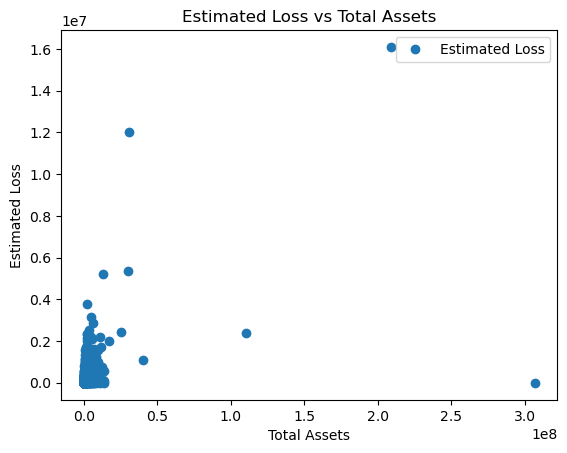

In [11]:
#Create a scatterplot using matplotlib for another look at how Estimated Loss and Total Assets plot against each other.
df.plot(x = 'Total Assets', y='Estimated Loss',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Estimated Loss vs Total Assets')  
plt.xlabel('Total Assets')  
plt.ylabel('Estimated Loss')  
plt.show()

## 4. Hypothesis

#### HYPOTHESIS: If a bank owns a greater number of assets, then there will be an equally larger loss experienced by a failed bank.

## 5. Reshape the variables into Arrays: X = Independent, Y = Dependant

In [12]:
#Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Total Assets'].values.reshape(-1,1)
y = df['Estimated Loss'].values.reshape(-1,1)

In [13]:
#The Independant variable array
X

array([[1.1036365e+08],
       [2.0902600e+08],
       [6.5733000e+04],
       ...,
       [1.2444000e+04],
       [3.3184643e+04],
       [3.0270000e+03]])

In [14]:
#The Dependant variable array
y

array([[ 2400000],
       [16100000],
       [   16330],
       ...,
       [     221],
       [     127],
       [      88]], dtype=int64)

## 6. Split the Data into Two Sets: Training Set & Test Set

In [15]:
#Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 7. Linear Regression

### 7a. Fitting the model to the Training Set

##### Model Summary Statistics

In [16]:
#Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [17]:
#Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
#Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [19]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [20]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00699515]]
Mean squared error:  70350907784.20056
R2 score:  0.030525252436363504


##### Plotting the Regression Line

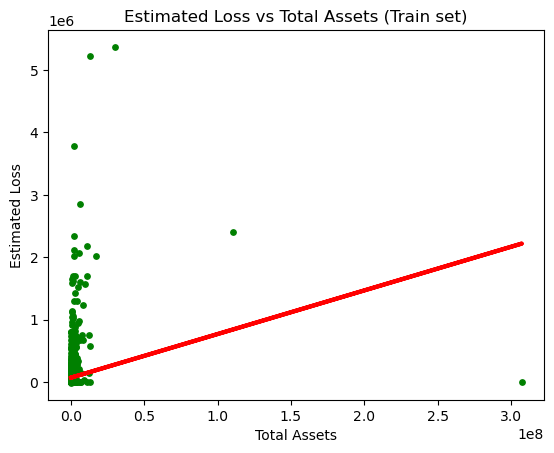

In [21]:
#Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Estimated Loss vs Total Assets (Train set)')
plot_test.xlabel('Total Assets')
plot_test.ylabel('Estimated Loss')
plot_test.show()

#### Observations:  It may be worth looking into Logisitic Regression vs. Linear Regression for this dataset to compare the categorical variables.

### 7b. Create a Prediction for Y on the Test Set

In [22]:
#Predict the values of y using X.
y_predicted = regression.predict(X_test)

## 8. Create a Plot Showing the Regression on the Test Set

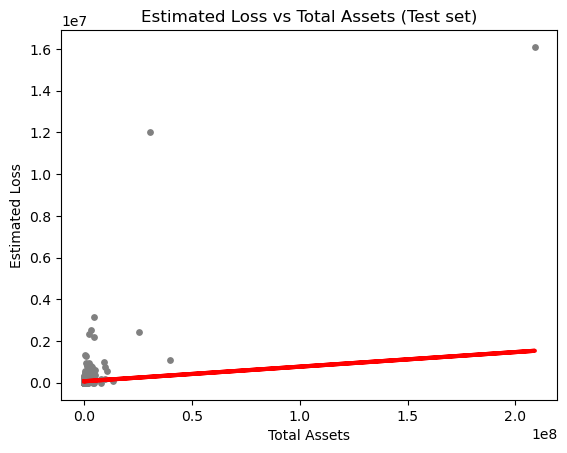

In [23]:
#Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Estimated Loss vs Total Assets (Test set)')
plot_test.xlabel('Total Assets')
plot_test.ylabel('Estimated Loss')
plot_test.show()

## 9. Regression Interpretation 

#### There is a positive correlation between how much loss a bank will experience when considering the number of assets that they had at the time of failure.  However, the correlation is pretty low given the slope of the regression line and the R2 score.  The MSE is quite larege, but this is because of the large number of assets being considered, so doesn't tell us much.   There appear to be a few extreme outliers that may be skewing this data.

## 10. Model Summary Statistics

In [24]:
#Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
#Print the model summary statistics. This is where I evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00699515]]
Mean squared error:  380445601474.20667
R2 score:  0.11609909110735683


In [26]:
y_predicted

array([[ 72599.53353974],
       [249757.61390638],
       [ 71874.67532917],
       ...,
       [ 74746.16255559],
       [ 71805.14355907],
       [ 72047.73528815]])

## 11. Creating Comparison Dataframe: Actual vs. Predicted

In [27]:
#Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,73814,72599.533540
1,2414792,249757.613906
2,3933,71874.675329
3,829701,83133.456807
4,8837,71870.212425
5,2876,72186.057343
6,78589,72236.100631
7,48746,72868.496976
8,8557,72149.948389
9,33554,72131.138437


## 12. Reflections 

#### Observations:  The predictive model did not perform very well given the large differences in the actual vs predicitve statistics.  It might be worth noting again the few outliers that may be skewing the data.  There is also consideration for the failed banks that were not included pre-1980 as there was no information on the Estimated losses for those banks.  There could be significant differences in the time periods for pre- and post- 1980 that may have affected the results, however we cannot know that definitively.  All we can see is that this model oes not do a good job predicting Estimated losses based on Total Assets for failed banks post 1980.

#### I find it highly unlikely that the FDIC had incorrectly recorded the information as it is a federal database.  There could be a sample bias, as this list only shows failed banks and failed banks may come in many shapes and forms depending on location, whether they are commercial or Savings Institutions, whether there was a large economic condition that resulted in certain banks failing in a given year depending on asset type (which this dataset does not include; Asset type or Deposit Type could help narrow down why this trend is the way it is).  We may simply need more information with a larger sample set to determine this, however, for that to happen we would either need to have the missing information pre-1980 or have more banks fail (which we wouldn't want for real life reasons).  We could have an exclusion bias, as we are not including banks pre-1980 gien that Estimated losses were not provided.  

#### I think if we could include more specific financial information for these failed banks we could see a more definitive picture, or at the very least have more to work with.  Another comparison worth looking into could be comparing all financial institutions to the failed banks based on their commercial status and location (State) during the year the failed.  This may shed some light on why these banks failed where others didn't and be a more apple-to-apple comparison.

## Bonus: Removing Outliers for Further Analysis

##### Describing the Dataframe

In [28]:
#Original dataframe descriptive statistics
df.describe()

,Certification,Estimated Loss,FIN,ID,Total Assets,Total Deposits
count,3468.000000,3.468000e+03,3468.000000,3468.000000,3.468000e+03,3.468000e+03
mean,24607.085928,7.998170e+04,4926.396482,2352.544983,5.599016e+05,4.392969e+05
std,11685.109468,4.243630e+05,3051.702123,1014.128858,6.740647e+06,4.733224e+06
min,40.000000,-1.138100e+04,0.000000,563.000000,1.731000e+03,0.000000e+00
25%,18336.500000,3.161000e+03,2377.750000,1477.750000,2.487300e+04,2.445750e+04
50%,26378.500000,1.130400e+04,4308.500000,2357.500000,6.876950e+04,6.734650e+04
75%,31014.750000,4.289825e+04,7185.250000,3224.250000,2.203200e+05,2.053102e+05
max,91189.000000,1.610000e+07,10540.000000,4106.000000,3.070216e+08,1.882608e+08


##### Defining the Upper Limit to Remove the Outliers

In [29]:
#Clean the extreme values from the "Total Assets" variable observed during the consistency checks.
df_test = df[df['Total Assets'] <=221000] 

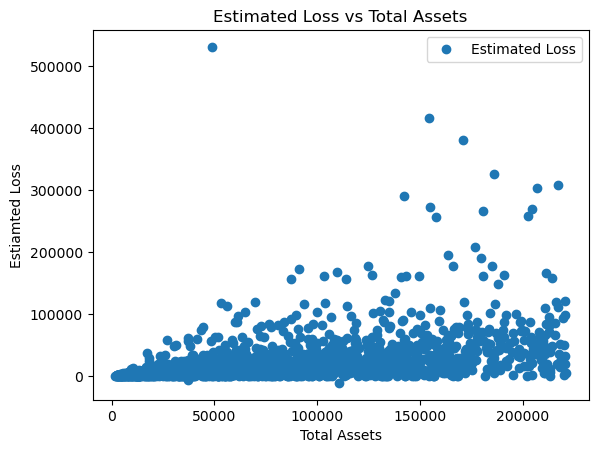

In [30]:
#See how the scatterplot looks without outliers.
df_test.plot(x = 'Total Assets', y='Estimated Loss', style='o')  
plt.title('Estimated Loss vs Total Assets')  
plt.xlabel('Total Assets')  
plt.ylabel('Estiamted Loss')  
plt.show()

##### Reshaping the Variablies once again for the Dataframe w/o Extreme Outliers

In [31]:
#Reshape again.
X_2 = df_test['Total Assets'].values.reshape(-1,1)
y_2 = df_test['Estimated Loss'].values.reshape(-1,1)

In [32]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

##### Run the Regression line

In [33]:
#Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

##### Regression Line: Test Set

In [34]:
#Predict.
y_predicted_2 = regression.predict(X_test_2)

In [35]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.31576945]]
Mean squared error:  556729486.3351275
R2 score:  0.24957548003807228


##### Plotting the Regression Line

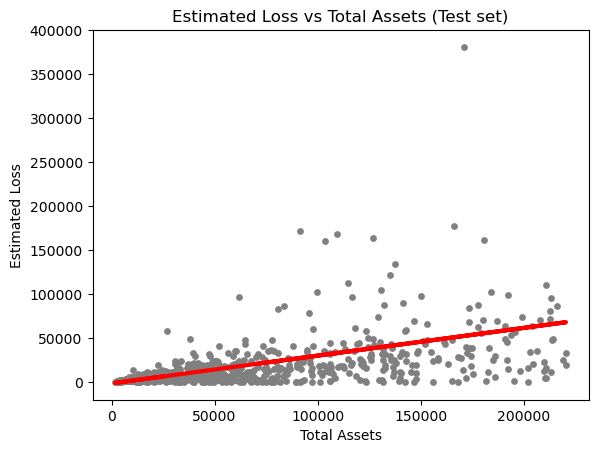

In [37]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Estimated Loss vs Total Assets (Test set)')
plot_test.xlabel('Total Assets')
plot_test.ylabel('Estimated Loss')
plot_test.show()

##### Creating Comparison Dataframe: Actual vs. Predicted

In [38]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,6273,6007.213698
1,4492,5155.899251
2,45596,39402.043825
3,6797,35808.146626
4,3756,3203.496718
5,17620,12775.100402
6,18485,36857.889336
7,765,-845.299219
8,24158,8960.921169
9,69120,57393.639995


### Observations:  Even after we removed the extreme outliers by making taking only the values that were capped at the Q3 of the IQR, the slope resembles what we had with the outliers in place.  The predicitive model does not do a fair job at predicting what the estimated losses will be.  

### There is the presence of an apparent extreme outlier and several points that seem to be resemble outliers as they lay further away from the regression line than most.